# BSE Normal Distribution 

In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
beml_df = pd.read_csv('BEML.csv')
#beml_df[0:5]

In [3]:
beml_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [4]:
glaxo_df = pd.read_csv('GLAXO.csv')
glaxo_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [5]:
beml_df  = beml_df[['Date', 'Close']]
glaxo_df = glaxo_df[['Date', 'Close']]

In [6]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [7]:
glaxo_df.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


In [8]:
beml_df.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1135.60
2010-01-05,2010-01-05,1134.60
2010-01-06,2010-01-06,1139.60
2010-01-07,2010-01-07,1144.15
2010-01-08,2010-01-08,1144.05


In [9]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0, 0.5, 'Close  price')

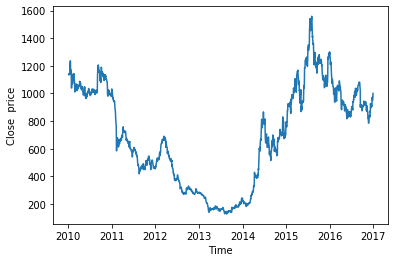

In [10]:
plt.plot(beml_df.Close)
plt.xlabel('Time')
plt.ylabel('Close  price')

Text(0, 0.5, 'Close  price')

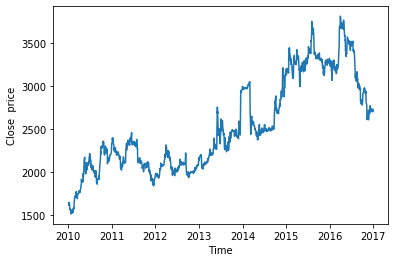

In [11]:
plt.plot(glaxo_df.Close)
plt.xlabel('Time')
plt.ylabel('Close  price')

What if an intraday investor is intreasted in understanding the following charateristics about these stocks.

1. What is the expected daily rate  of return of thesse stocks?                                                           
2. Which stock have higher risk or volatility as far as daily returns are concerned?                                           
3. What is the expected range of return for 95% confidence interval?
4. Which stock has higher probability of making a daily return of 2% of more?
5. Which stock has higher probability of making a loss (risk) of 2% or more?

In [12]:
glaxo_df['Gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['Gain'] = beml_df.Close.pct_change(periods = 1)
glaxo_df.head()

,Date,Close,Gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


In [13]:
beml_df.head()

,Date,Close,Gain
Date,,,
2010-01-04,2010-01-04,1135.60,NaN
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087


In [14]:
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

In [15]:
beml_df.head()

,Date,Close,Gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162


Text(0, 0.5, 'Gain')

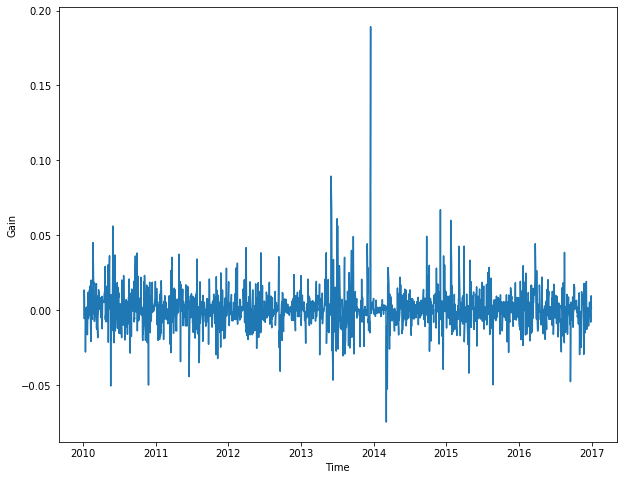

In [16]:
plt.figure(figsize = (10, 8))
plt.plot(glaxo_df.index, glaxo_df.Gain)
plt.xlabel('Time')
plt.ylabel('Gain')

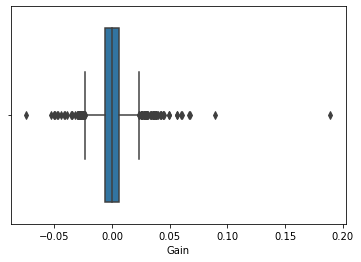

In [17]:
sn.boxplot(x =  glaxo_df.Gain)
#sn.xlabel('Time')
#sn.ylabel('Gain')

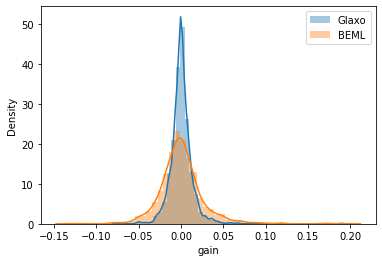

In [18]:
sn.distplot(glaxo_df.Gain, label = 'Glaxo')
sn.distplot(beml_df.Gain, label = 'BEML')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

BEML seems to have higher variance than Glaxo 

In [19]:
beml_df.Gain.describe()

count    1738.000000
mean        0.000271
std         0.026431
min        -0.133940
25%        -0.013736
50%        -0.001541
75%         0.011985
max         0.198329
Name: Gain, dtype: float64

In [24]:
from scipy import stats 

glaxo_df_ci = stats.norm.interval(0.95,loc = glaxo_df.Gain.mean(),scale= glaxo_df.Gain.std())
print("Gain at 95% confidence interval is :", np.round(glaxo_df_ci, 4))

Gain at 95% confidence interval is : [-0.0258  0.0266]


In [25]:
beml_df_ci = stats.norm.interval(0.95,loc = beml_df.Gain.mean(),scale= beml_df.Gain.std())
print("Gain at 95% confidence interval is :", np.round(beml_df_ci, 4))

Gain at 95% confidence interval is : [-0.0515  0.0521]


In [26]:
print("Probability of making 2% loss or higher in Glaxo : ")
stats.norm.cdf(-0.02, loc= glaxo_df.Gain.mean(),scale = glaxo_df.Gain.std())

Probability of making 2% loss or higher in Glaxo : 


0.06352488667177397

In [27]:
print("Probability of making 2% loss or higher in BEML : ")
stats.norm.cdf(-0.02, loc= beml_df.Gain.mean(),scale = beml_df.Gain.std())

Probability of making 2% loss or higher in BEML : 


0.22155987503755292

In [28]:
print("Probability of making 2% gain or higher in Glaxo : ")
1 - stats.norm.cdf(0.02, loc= glaxo_df.Gain.mean(),scale = glaxo_df.Gain.std())

Probability of making 2% gain or higher in Glaxo : 


0.07104511457618568

In [29]:
print("Probability of making 2% loss or higher in BEML : ")
stats.norm.cdf(-0.02, loc= beml_df.Gain.mean(),scale = beml_df.Gain.std())

Probability of making 2% loss or higher in BEML : 


0.22155987503755292

# The probability of making 2% gain or higher in GLAXO is 7.1%
# The probability of making 2% gain or higher in BEML is 22.76%